<a href="https://colab.research.google.com/github/shyamkryadav/AiTesting/blob/master/first_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read the csv file and split the data into 70% train and 30% test. Enable a particular random_state.(I will describe what random_state is in next class).
Train a Logistic Regression model using scikit-learn.
Evaluate the model with the evaluation metrics.
Optional: Try to hard code
Accuracy
Recall
Precision
Confusion Matrix
Finally, Plot the decision boundary.
You can take reference from the materials provided.





In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [22]:
df=pd.read_csv('./Mobile.csv')
df.head()

,years_used,battery_life_hours,usable
0,3.75,4.44,1
1,9.51,3.44,0
2,7.32,6.65,1
3,5.99,3.22,0
4,1.56,3.94,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   years_used          250 non-null    float64
 1   battery_life_hours  250 non-null    float64
 2   usable              250 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.0 KB


In [24]:
df.describe()

,years_used,battery_life_hours,usable
count,250.000000,250.000000,250.000000
mean,4.904200,5.065080,0.756000
std,2.974443,2.200452,0.430354
min,0.050000,0.090000,0.000000
25%,2.310000,3.327500,1.000000
50%,5.030000,5.270000,1.000000
75%,7.535000,6.797500,1.000000
max,9.870000,9.490000,1.000000


In [25]:
# prompt: find the accuracy
x=df.drop('usable',axis=1)
y=df['usable']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.96


In [28]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Recall: 1.0
Precision: 0.9464285714285714
Confusion Matrix:
 [[19  3]
 [ 0 53]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


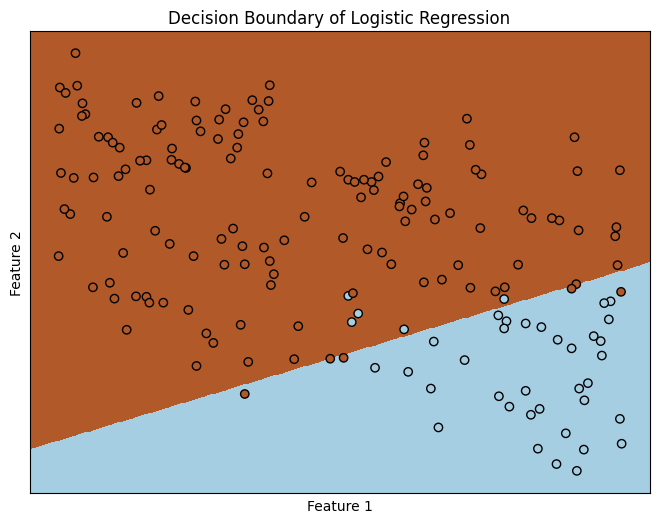

In [29]:
# prompt: Finally, Plot the decision boundary

# Assuming you have x_train, y_train, and model from your previous code

# Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = x_train.iloc[:, 0].min() - .5, x_train.iloc[:, 0].max() + .5
y_min, y_max = x_train.iloc[:, 1].min() - .5, x_train.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain the predicted probabilities for the meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot the training points
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [30]:
# prompt: push on git

# Assuming you have a Git repository initialized in your Colab environment
# and you've configured your Git credentials.

!git add .
!git commit -m "Committing changes from Colab"
!git push origin main # Replace 'main' with your branch name if different

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
